<a href="https://colab.research.google.com/github/aayush-rath/Sporty-Guru/blob/main/Sporty_Guru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


In this notebook I have created three Neural Networks which classify a given set of data into the following nine categories:
1. airplane ✈
2. automobile 🚙
3. bird 🐦
4. cat 🐈
5. deer 🦌
6. dog 🐶
7. frog 🐸
8. horse 🐴
9. ship 🚢
10. truck 🚚

In all the neural networks I have evaluated the loss function as the mean average error and for the optimization, I have implemented the Adam optimizer algorithm with batch size 500 and the number epochs has been set to 50

*Aayush Rath*

*Second-Year Undergraduate Student*

*Department of Ocean Engineering*

*Indian Intitute of Technology, Madras*


In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
print('Required libraries imported')

Required libraries imported


It is ideal to run the neural networks on GPU which are really good at parallel processing and require much less computational time. If the following code outputs no GPU device found then go to Edit-->Notebook Settings-->Hardware Accelerator and select 'GPU'

In [2]:
#To check if the gpu is functional
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


The given data set is an array of shape (50000, 32, 32, 3) i.e. there are 50000 samples. Each sample has the RGB pixel data of an 32x32 image. Thus there are 32x32x3 = 3072 input parameters

170508288/170498071 [==============================] - 2s 0us/step
(50000, 1)


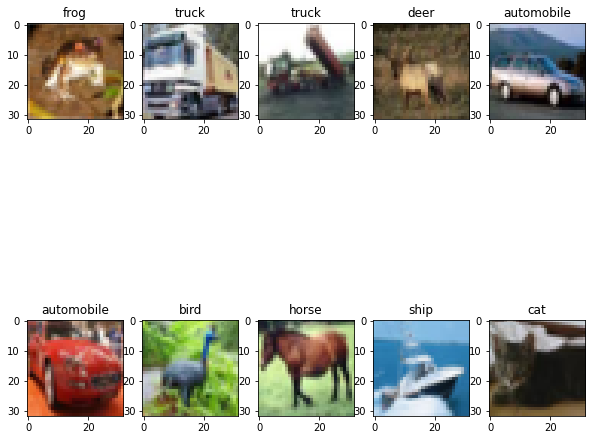

In [3]:
#Segragating the data set into train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
dictionary = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Observing the given data set by viewing the images
f, arr = plt.subplots(2, 5, figsize=(10,10))
for i in range(10):
  if i < 5:
    arr[0,i].imshow(x_train[i])
    a = dictionary[int(y_train[i])]
    arr[0,i].set_title(a)
  else:
    arr[1,i-5].imshow(x_train[i])
    a = dictionary[int(y_train[i])]
    arr[1,i-5].set_title(a)

The first Neural Network is a very simple linear model with just one unit connected to the input parameters which is first converted to a vector of size 3072

In [4]:
NetA = keras.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(1)
])

NetA.compile(
    optimizer='adam',
    loss='mae'
)

histA = NetA.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=500,
    epochs=50,
    verbose=0
)

The Second Neural Network has 300 hidden layer units with ReLU activation function and finally an output layer

In [5]:
NetB = keras.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(300, activation='relu'),
    layers.Dense(1)
])

NetB.compile(
    optimizer='adam',
    loss='mae'
)

histB = NetB.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=500,
    epochs=50,
    verbose=0
)

The third Neural Network is a CNN with a convolution of layer with kernel size (5,5), depth 25 and ReLU activation followed by a layer that performs Maximum Pooling finally an output layer

In [6]:
NetC = keras.Sequential([
    layers.Conv2D(filters=25, kernel_size=5, activation='relu', input_shape=[32,32,3]),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(1)
])

NetC.compile(
    optimizer='adam',
    loss='mae'
)

histC = NetC.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=500,
    epochs=50,
    verbose=0
)

In [7]:
hist = {'A':histA, 'B':histB, 'C':histC}

In [20]:
pred = {'A': NetA.predict(x_test), 'B':NetB.predict(x_test), 'C':NetC.predict(x_test)}

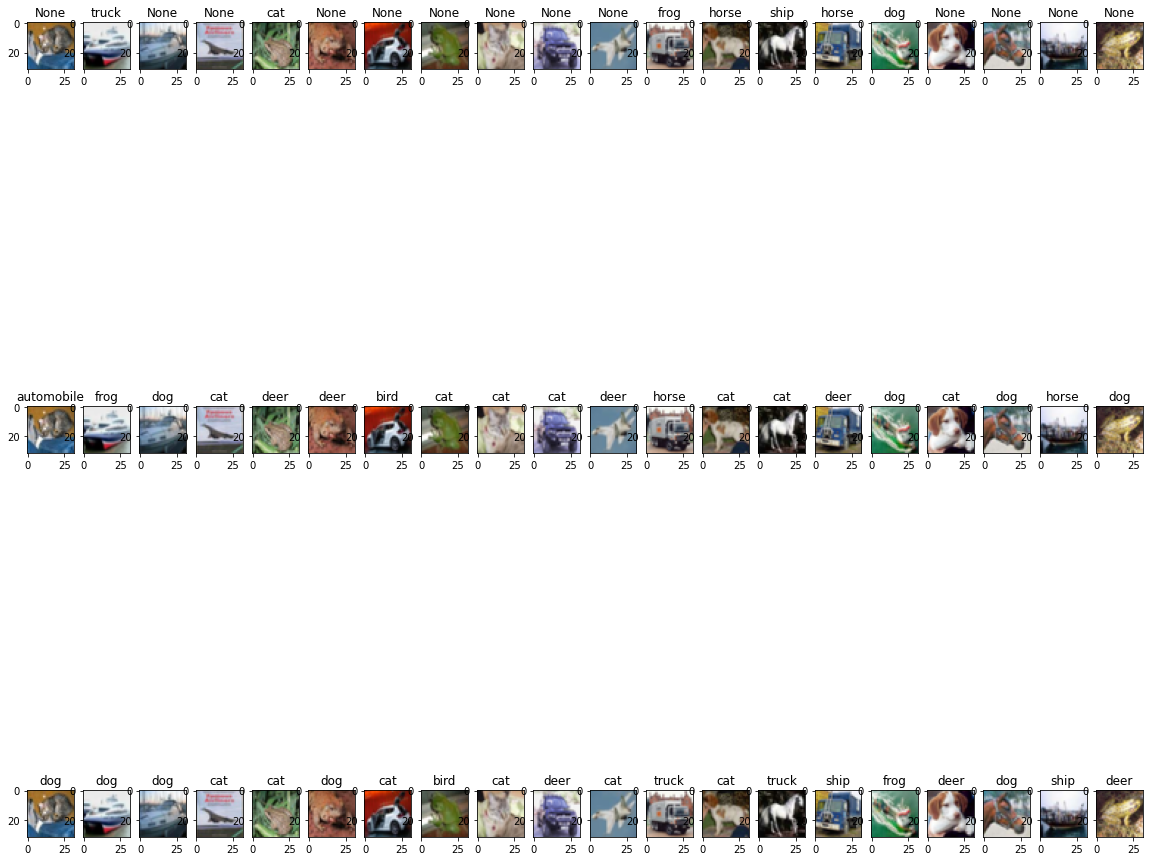

In [21]:
f, arr = plt.subplots(3, 20, figsize=(20, 20))
for i in range(20):
  a = pred['A']
  arr[0,i].imshow(x_test[i])
  try:
    arr[0,i].set_title(dictionary[int(a[i])])
  except:
    arr[0,i].set_title('None')
  a = pred['B']
  arr[1,i].imshow(x_test[i])
  try:
    arr[1,i].set_title(dictionary[int(a[i])])
  except:
    arr[1,i].set_title('None')
  a = pred['C']
  arr[2,i].imshow(x_test[i])
  try:
    arr[2,i].set_title(dictionary[int(a[i])])
  except:
    arr[2,i].set_title('None')

As expected after running the following code we find that in terms of accuracy and loss plots, C performs better than B which performs better than A.

Minimum Validation Loss of Net A: 10.4250
Accuracy of Net A: 10.39%
Minimum Validation Loss of Net B: 2.3550
Accuracy of Net B: 12.120000000000001%
Minimum Validation Loss of Net C: 2.1535
Accuracy of Net C: 15.43%


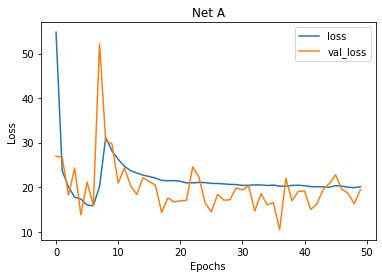

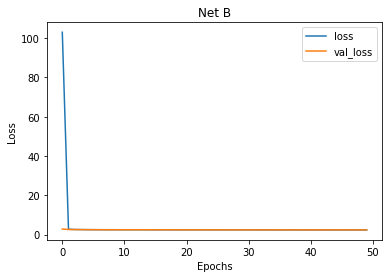

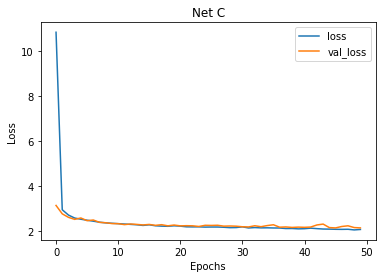

In [29]:
for i in ['A','B','C']:
  history_df = pd.DataFrame(hist[i].history)
  history_df.loc[:, ['loss', 'val_loss']].plot()
  plt.title('Net '+i)
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  print(('Minimum Validation Loss of Net '+i+': {:0.4f}').format(history_df['val_loss'].min()))
  pred[i] = tf.clip_by_value(pred[i], 0, 9)
  pred[i] = tf.round(pred[i])
  acct = np.array(y_test==pred[i])
  acc = np.sum(acct)/y_test.shape[0]
  print('Accuracy of Net ' + i + ': ' + str(acc*100) + '%')